In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-296-gae4ef3b2 Python-3.10.12 torch-2.2.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.3/107.7 GB disk)


In [3]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 132MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 188MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 223MB/s]

100%|██████████| 91.9M/91.9M [00:00<00:00, 164MB/s]

100%|██████████| 170M/170M [00:03<00:00, 50.3MB/s]



In [6]:


from roboflow import Roboflow
rf = Roboflow(api_key="aqZA8dkCYzjistX1dOgq")
project = rf.workspace("rudrani").project("endoscopy-eeeoy")
version = project.version(3)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to endoscopy-3 in yolov5pytorch:: 100%|██████████| 111/111 [00:00<00:00, 5373.84it/s]


/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-296-gae4ef3b2 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1435.5ms
Speed: 28.0ms pre-process, 1435.5ms inference, 3.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference2


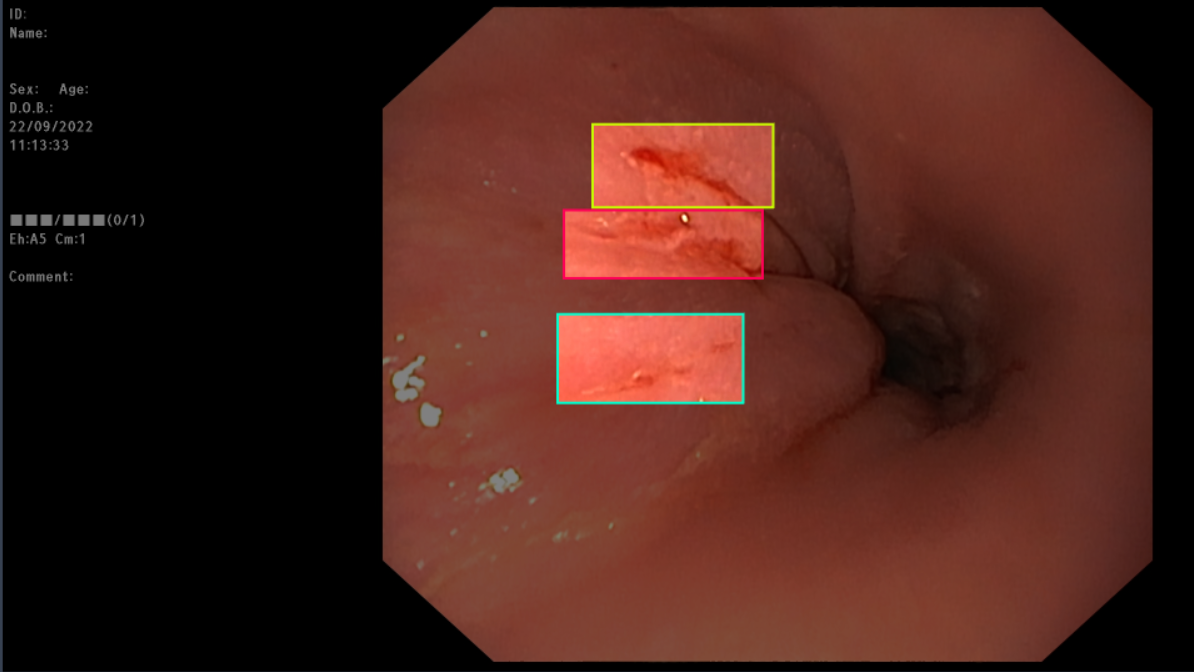

In [5]:
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference

display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/GERD.jpg", width=600)